In [29]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from salishsea_tools import evaltools as et, viz_tools, places
import datetime as dt
import matplotlib.dates as mdates
import matplotlib as mpl

%matplotlib inline

### load 2015-present atmospheric forcing files

### NOTE: the wind grid rotation is not the same as the SalishSeaCast grid rotation

In [2]:
startdate=dt.datetime(2015,3,1)
enddate=dt.datetime(2015,3,31)
opsdir='/results/forcing/atmospheric/GEM2.5/operational'

In [3]:
flist=et.index_model_files(startdate,enddate,opsdir,nam_fmt='ops',flen=1,ftype='None',tres=1)

In [4]:
flist

,paths,t_0,t_n
0,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-01,2015-03-02
1,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-02,2015-03-03
2,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-03,2015-03-04
3,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-04,2015-03-05
4,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-05,2015-03-06
5,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-06,2015-03-07
6,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-07,2015-03-08
7,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-08,2015-03-09
8,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-09,2015-03-10
9,/results/forcing/atmospheric/GEM2.5/operationa...,2015-03-10,2015-03-11


In [5]:
windsMarch=xr.open_mfdataset(flist['paths'])

In [12]:
jw,iw=places.PLACES['S3']['GEM2.5 grid ji']

In [7]:
windsMarch

<xarray.Dataset>
Dimensions:       (time_counter: 744, x: 256, y: 266)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2015-03-01 ... 2015-03-31T23:...
  * x             (x) float64 0.0 2.5e+03 5e+03 ... 6.325e+05 6.35e+05 6.375e+05
  * y             (y) float64 0.0 2.5e+03 5e+03 ... 6.575e+05 6.6e+05 6.625e+05
Data variables:
    atmpres       (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    nav_lat       (time_counter, y, x) float64 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    nav_lon       (time_counter, y, x) float64 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    precip        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    qair          (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    solar         (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    tair          (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    therm_rad     (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    u_wind        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
    v_wind        (time_counter, y, x) float32 dask.array<chunksize=(24, 266, 256), meta=np.ndarray>
Attributes:
    Conventions:          CF-1.0
    GRIB2_grid_template:  20
    NCO:                  4.4.2
    History:              Thu Dec 31 12:23:23 2015: ncatted -O -a time_origin...

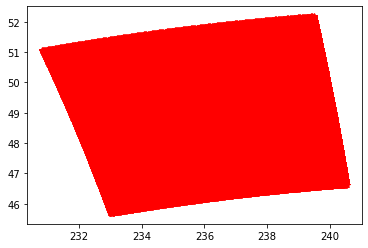

In [8]:
plt.plot(windsMarch.nav_lon.isel(time_counter=0),
         windsMarch.nav_lat.isel(time_counter=0),'r*');

In [17]:
# grab interesting values:
u_wind=windsMarch.u_wind.isel(y=jw,x=iw)
v_wind=windsMarch.v_wind.isel(y=jw,x=iw)

In [18]:
tt=windsMarch.time_counter

Text(0.5, 1.0, 'Wind speed')

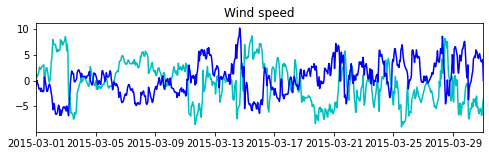

In [36]:
fig,ax=plt.subplots(1,1,figsize=(8,2))
ax.plot(tt,u_wind,'c-')
ax.plot(tt,v_wind,'b-')
ax.set_xlim(startdate,enddate)
ax.set_title('Wind speed')

In [22]:
wspeed=np.sqrt(u_wind**2 + v_wind**2)

In [23]:
d = np.arctan2(v_wind, u_wind)
winddirec=np.rad2deg(d + (d < 0)*2*np.pi)

(16495.0, 16525.0)

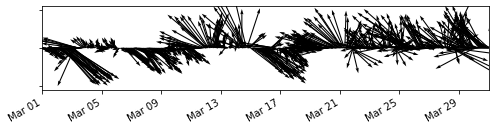

In [34]:
fig,ax=plt.subplots(1,1,figsize=(8,2))
q=ax.quiver(tt, np.zeros(len(tt)), u_wind, v_wind,scale=8*10e0);
ax.set_yticklabels([]);
fig.autofmt_xdate(bottom=0.3, rotation=30, ha='right')
yearsFmt = mdates.DateFormatter('%b %d')
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_xlim(startdate,enddate)

In [37]:
solar=windsMarch.solar.isel(y=jw,x=iw)

Text(0.5, 1.0, 'Solar radiation')

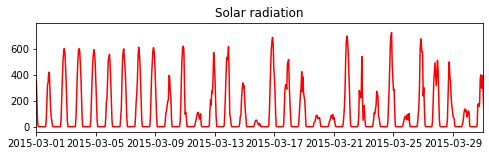

In [38]:
fig,ax=plt.subplots(1,1,figsize=(8,2))
ax.plot(tt,solar,'r-')
ax.set_xlim(startdate,enddate)
ax.set_title('Solar radiation')

In [40]:
# calculate daily average solar radiation:
ttday=tt[12::24] # start at 12th value and take every 24th
solardaily=list()
for ii in range(0,int(len(solar)/24)):
    solardaily.append(np.mean(solar[(ii*24):((ii+1)*24)]))
solardaily=np.array(solardaily)

Text(0.5, 1.0, 'Daily average solar radiation')

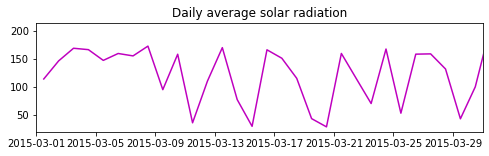

In [41]:
fig,ax=plt.subplots(1,1,figsize=(8,2))
ax.plot(ttday,solardaily,'m-')
ax.set_xlim(startdate,enddate)
ax.set_title('Daily average solar radiation')